In [41]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 30)

In [42]:
df = pd.DataFrame(index = ['Start', 'End'], 
                  columns = ['S{}'.format(i) for i in np.arange(10)])

In [43]:
def fill(x):
    start = random.randint(4, 10)
    end = random.randint(17, 20)
    
    return [start, end]

df = df.apply(lambda x: fill(x), axis = 0)

In [44]:
def checkCensor(x, l, u):
    
    if x['Start'] < l and x['End'] > u:
        return 'Both'
    elif x['Start'] < l:
        return 'Left'
    elif x['End'] > u:
        return 'Right'
    else:
        return 'Observed'

In [45]:
start = 7
end = 18

In [46]:
df.loc['Censorship', :] = df.apply(lambda x: checkCensor(x, start, end), axis = 0)

In [47]:
color_dict = {'Both': 'grey', 'Left': 'blue', 'Right': 'red', 'Observed': 'green'}

In [49]:
df_ = df.T

In [54]:
df_

,Start,End,Censorship
S0,8,17,Observed
S2,8,19,Right
S3,8,19,Right
S4,9,20,Right
S6,10,18,Observed
S7,8,20,Right
S8,6,17,Left


In [57]:
df_ = df_[df_['Censorship'] != 'Both']
df_['Start'] = np.where(df_['Start'] > 7, 7, df_['Start'])
df_

,Start,End,Censorship
S0,7,17,Observed
S2,7,19,Right
S3,7,19,Right
S4,7,20,Right
S6,7,18,Observed
S7,7,20,Right
S8,6,17,Left


In [ ]:
df.loc[:, 'actual_lifetime']

In [59]:
df = df_.T

In [61]:
df

,S0,S2,S3,S4,S6,S7,S8
Start,7,7,7,7,7,7,6
End,17,19,19,20,18,20,17
Censorship,Observed,Right,Right,Right,Observed,Right,Left


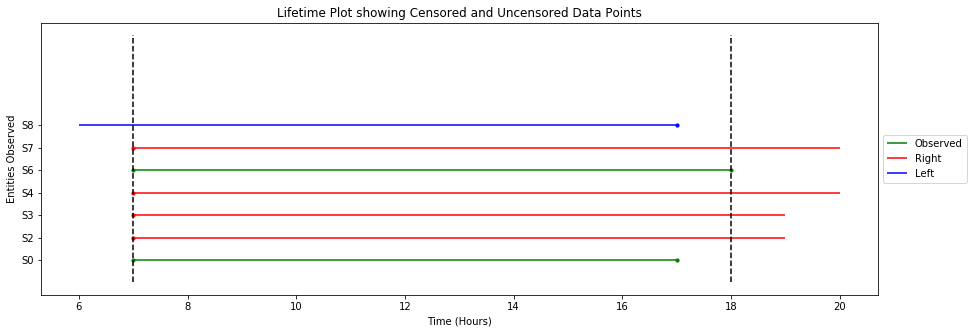

In [60]:
f, ax = plt.subplots(1, 1, figsize = (15, 5))
for i in df.columns:
    ax.hlines(i, df.loc['Start', i], 
              df.loc['End', i], lw=1.5, color = color_dict[df.loc['Censorship', i]], label = df.loc['Censorship', i])
    if(df.loc['Start', i] >= start):
        ax.scatter(df.loc['Start', i], i, c = color_dict[df.loc['Censorship', i]], marker = "o", s = 10)
    if(df.loc['End', i] <= end):
        ax.scatter(df.loc['End', i], i, c = color_dict[df.loc['Censorship', i]], marker = "o", s = 10)
        
ax.vlines(7, ymin = -1, ymax = 10, color = 'black', linestyles = '--')
ax.vlines(18, ymin = -1, ymax = 10, color = 'black', linestyles = '--')

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))

plt.legend(by_label.values(), by_label.keys(), loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('Entities Observed')
plt.xlabel('Time (Hours)')
plt.title('Lifetime Plot showing Censored and Uncensored Data Points')
plt.show()